In [1]:
import os

if os.path.basename(os.getcwd()) != "Musical-Note-Classification":
    os.chdir("../")

print(os.getcwd())

/home/jiawei/Desktop/github/Musical-Note-Classification


In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shap
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier

from src.constants import FEATURE_COLUMNS, LABEL, KNOWN_CLASSES, RESULT_DIR

/home/jiawei/deepmir_hw0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare Data

In [3]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [29]:
X_train = train_df[FEATURE_COLUMNS].to_numpy()
y_train = train_df[LABEL].to_numpy()

X_test = test_df[FEATURE_COLUMNS].to_numpy()
y_test = test_df[LABEL].to_numpy()

## Train the Baseline Model

### Train the SVM Model

In [5]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

### Evaluate the SVM Model

#### Calculate SVM Top1 and Topk Accuracy

In [6]:
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)

print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

Top-1 Accuracy: 65.14%
Top-3 Accuracy: 86.25%


#### Plot SVM Confusion Matrix

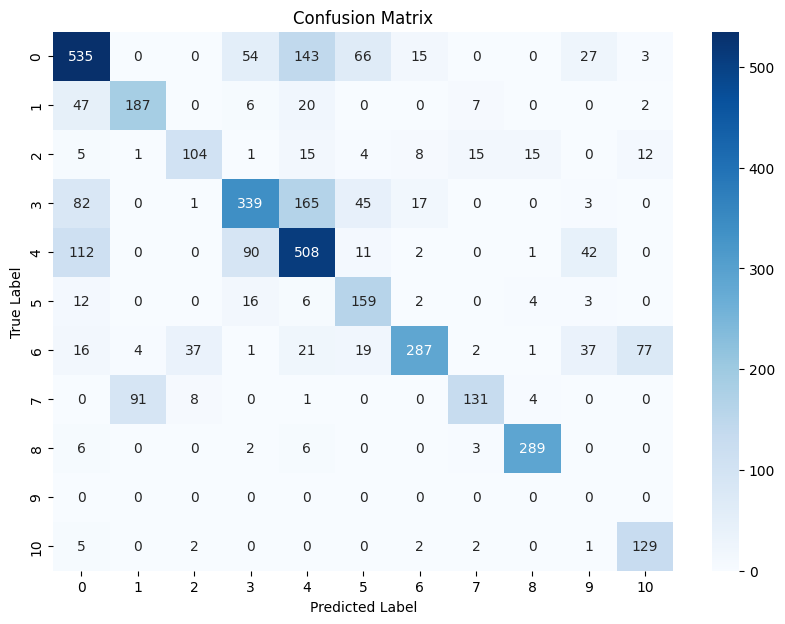

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=KNOWN_CLASSES, yticklabels=KNOWN_CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(RESULT_DIR, 'svm_confusion_matrix.png'))

### Train the Random Forest Model

In [8]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

### Evaluate the Random Forest Model

#### Calculate Random Forest Top1 and Topk Accuracy

In [9]:
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)

print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

Top-1 Accuracy: 68.53%
Top-3 Accuracy: 87.94%


#### Plot Random Forest Confusion Matrix

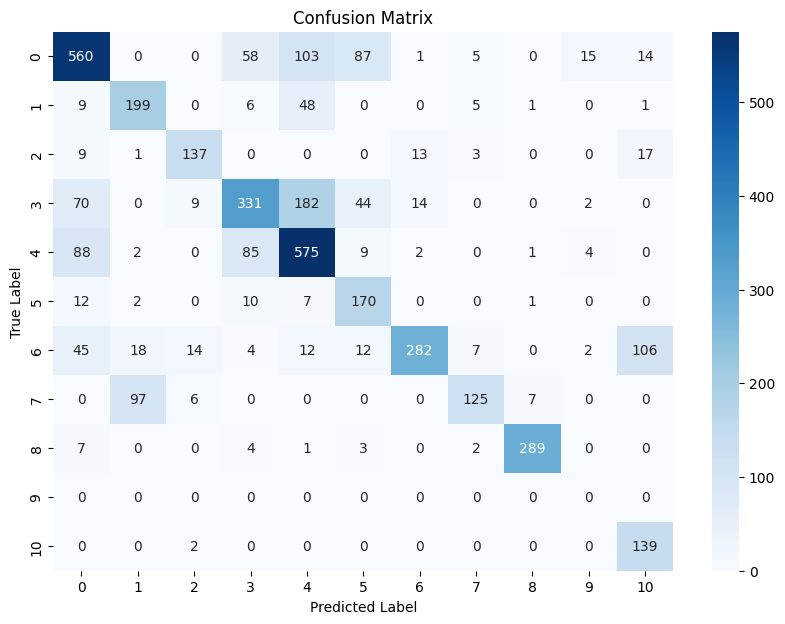

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=KNOWN_CLASSES, yticklabels=KNOWN_CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(RESULT_DIR, 'rf_confusion_matrix.png'))

### Train the XGBoost Model

In [11]:
model = XGBClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate the XGBoost Model

#### Calculate XGBoost Top1 and Topk Accuracy

In [12]:
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)

print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

Top-1 Accuracy: 69.68%
Top-3 Accuracy: 88.45%


#### Plot XGBoost Confusion Matrix

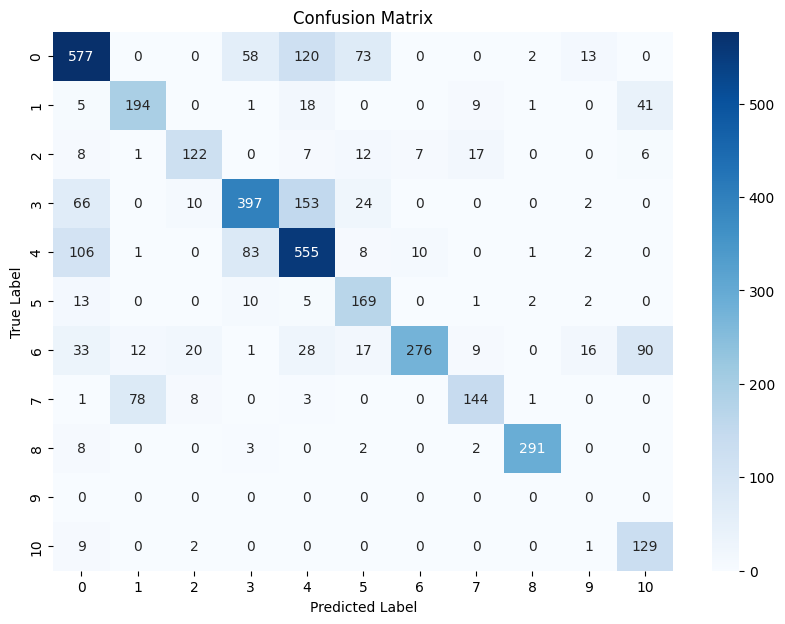

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=KNOWN_CLASSES, yticklabels=KNOWN_CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(RESULT_DIR, 'xgb_confusion_matrix.png'))

### Train the LightGBM Model

In [30]:
model = LGBMClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17980
[LightGBM] [Info] Number of data points in the train set: 48037, number of used features: 71
[LightGBM] [Info] Start training from score -2.261534
[LightGBM] [Info] Start training from score -2.644966
[LightGBM] [Info] Start training from score -2.456604
[LightGBM] [Info] Start training from score -2.338767
[LightGBM] [Info] Start training from score -2.360146
[LightGBM] [Info] Start training from score -2.329956
[LightGBM] [Info] Start training from score -2.368116
[LightGBM] [Info] Start training from score -2.429297
[LightGBM] [Info] Start training from score -2.529107
[LightGBM] [Info] Start training from score -2.350273
[LightGBM] [Info] Start training from score -2.363460


LGBMClassifier(n_estimators=400, random_state=42)

### Evaluate the LightGBM Model

#### Calculate LightGBM Top1 and Topk Accuracy

In [31]:
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)

print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

Top-1 Accuracy: 69.80%
Top-3 Accuracy: 87.62%


#### Plot LightGBM Confusion Matrix

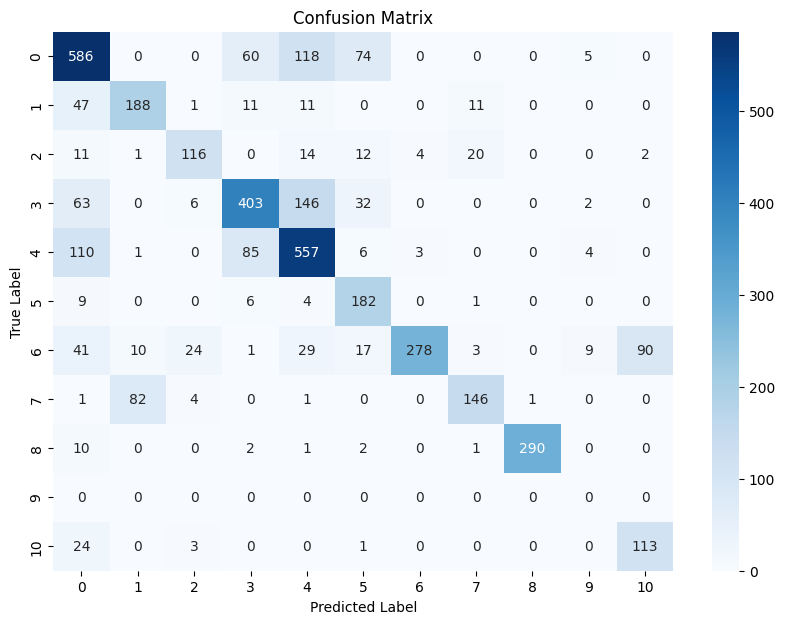

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=KNOWN_CLASSES, yticklabels=KNOWN_CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(RESULT_DIR, 'lgbm_confusion_matrix.png'))

### Plot Feature Importance

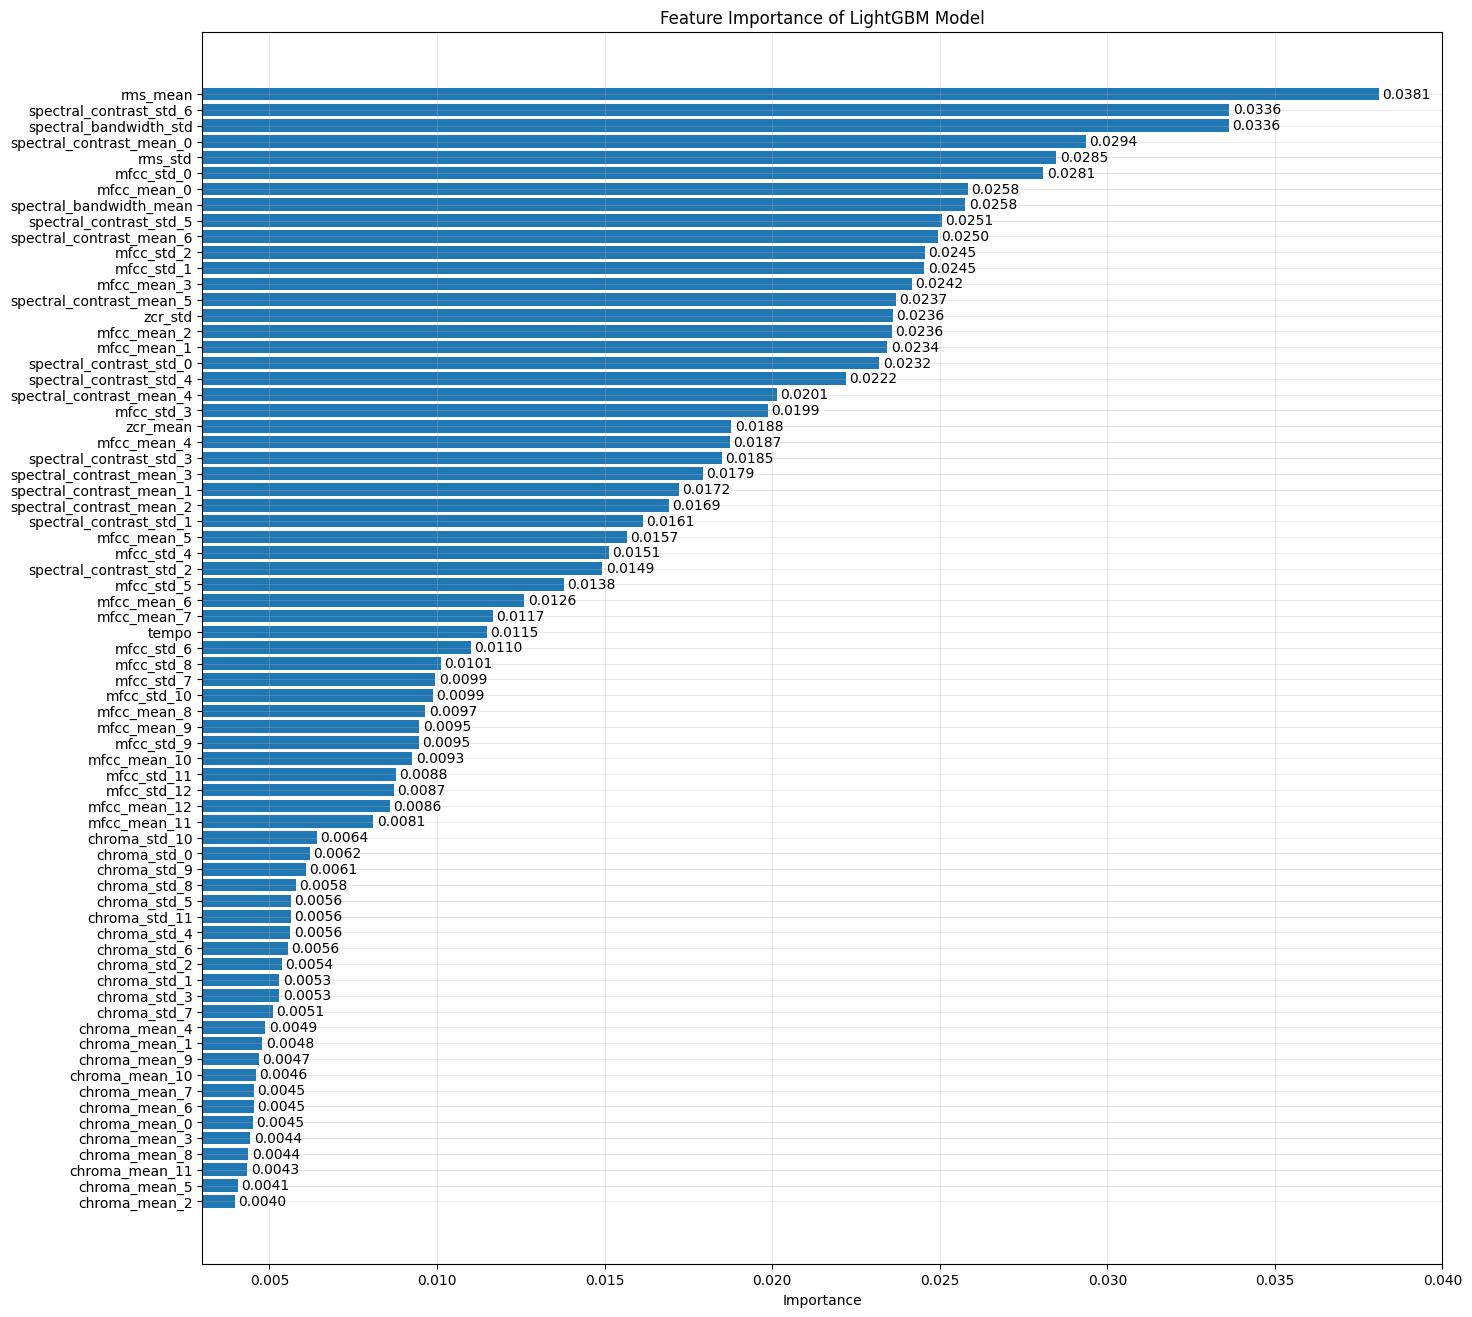

<Figure size 640x480 with 0 Axes>

In [61]:
feature_importances = model.feature_importances_ / model.feature_importances_.sum()

importance_df = pd.DataFrame(
    {
        'Feature': FEATURE_COLUMNS,
        'Importance': feature_importances
    }
).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 16))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance of LightGBM Model')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.xlim([0.003, 0.04])

for bar in bars:
    plt.text(
        bar.get_width() + 0.0001,
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.4f}',
        va='center',
    )

plt.show()
plt.savefig(os.path.join(RESULT_DIR, 'lgbm_feature_importance.png'))

### Plot Shapley Values

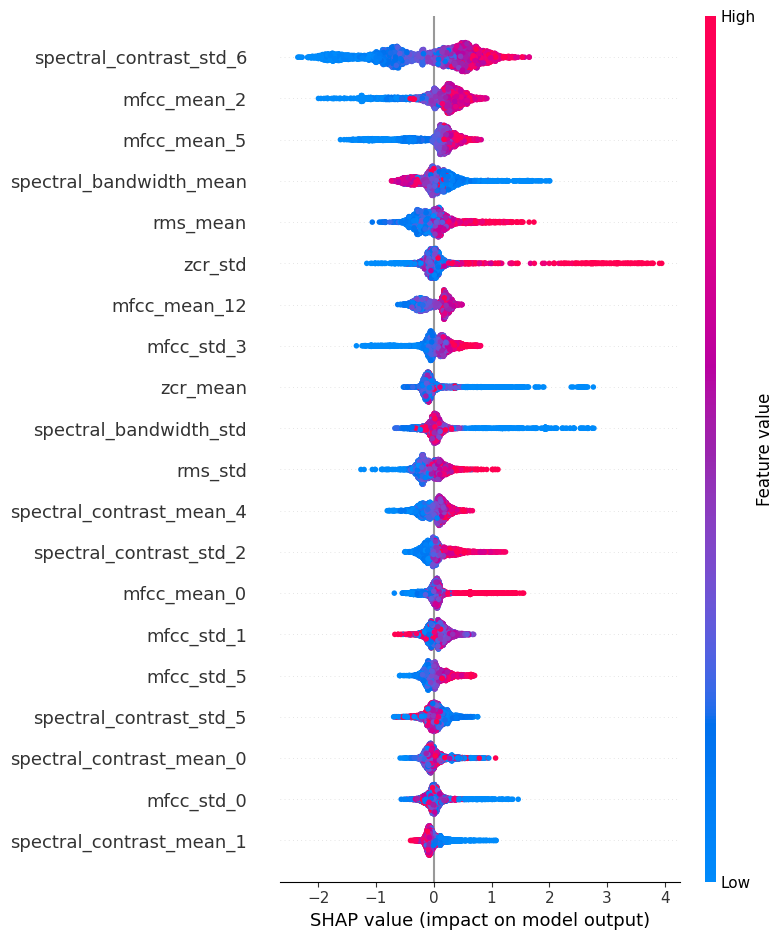

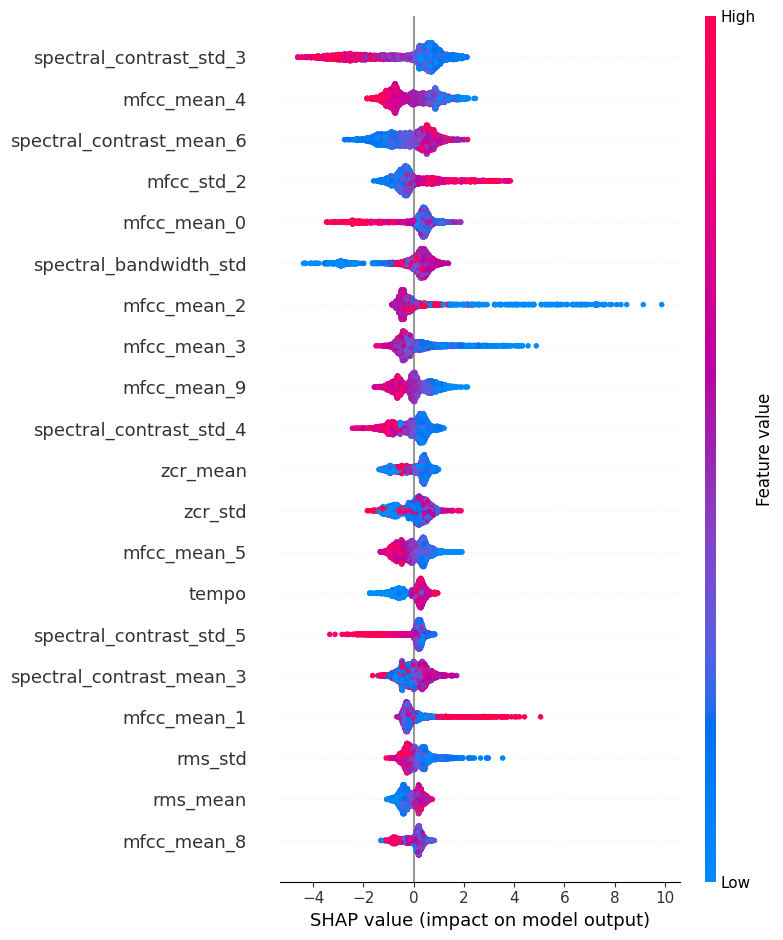

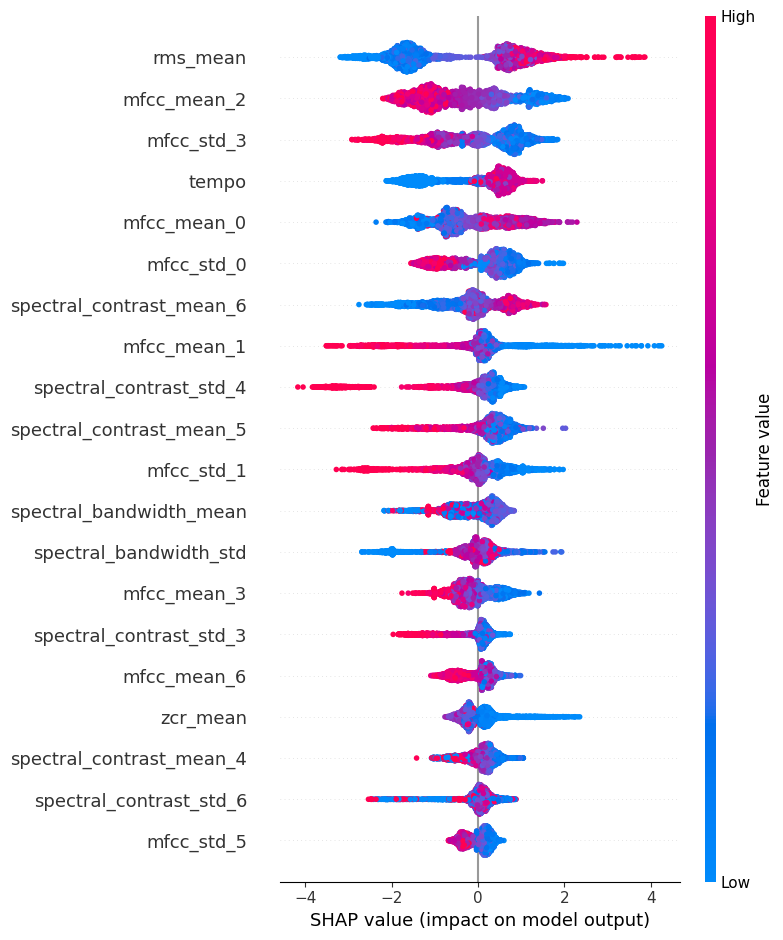

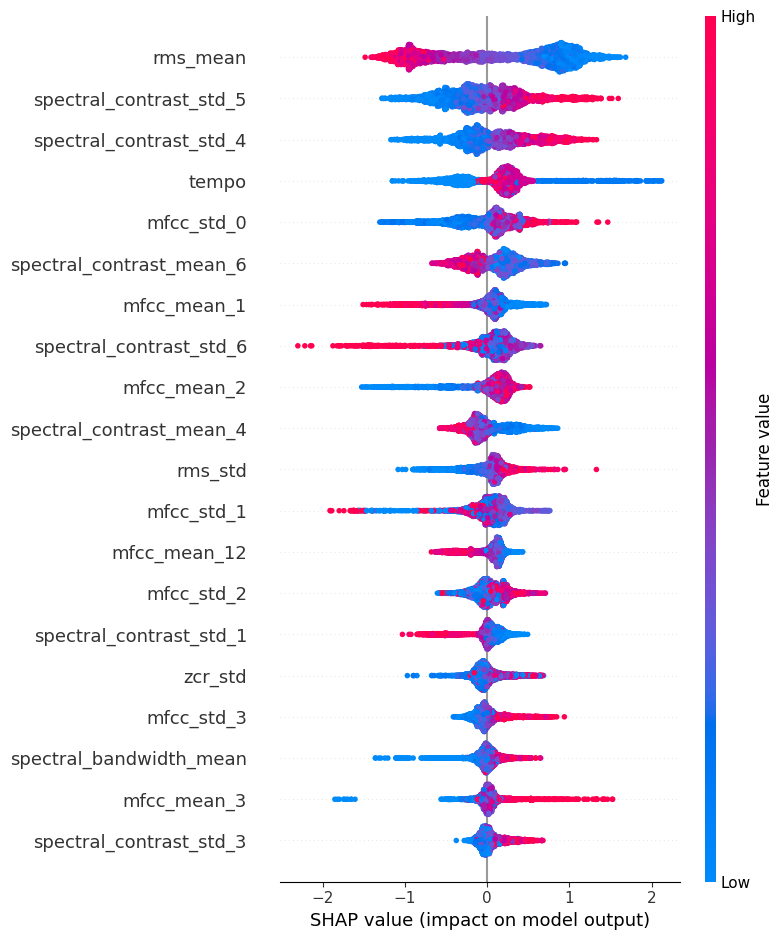

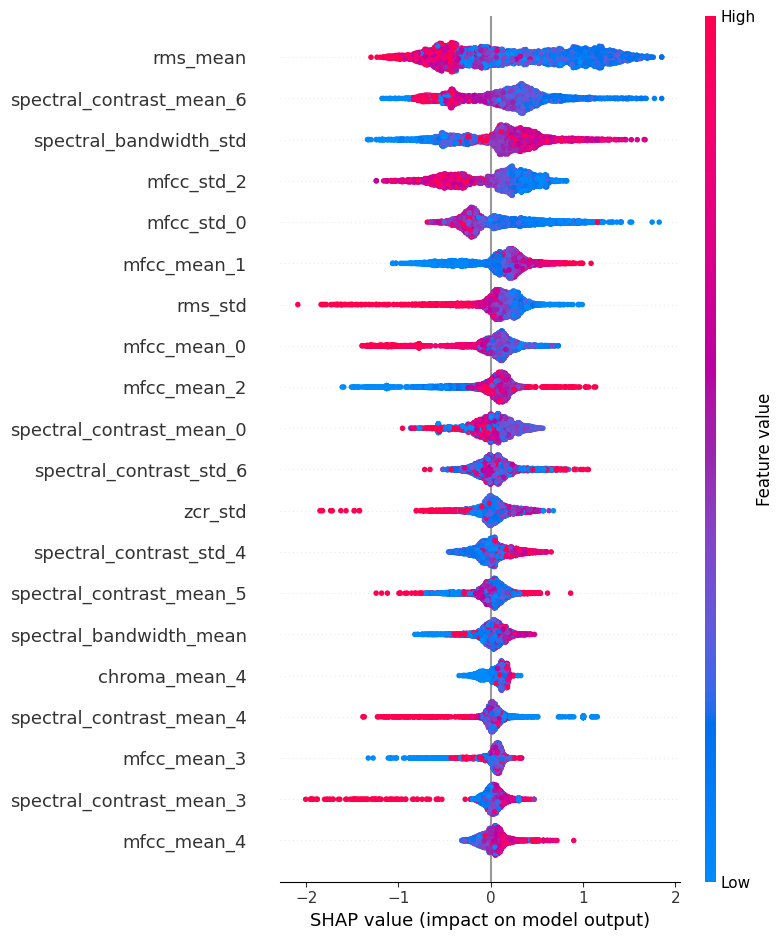

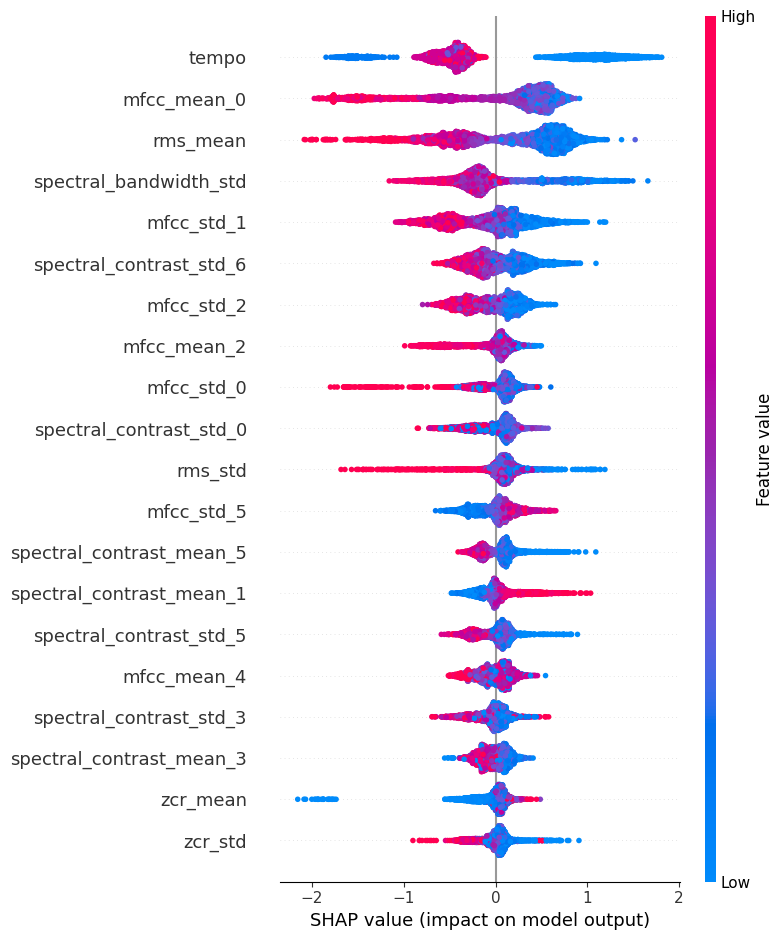

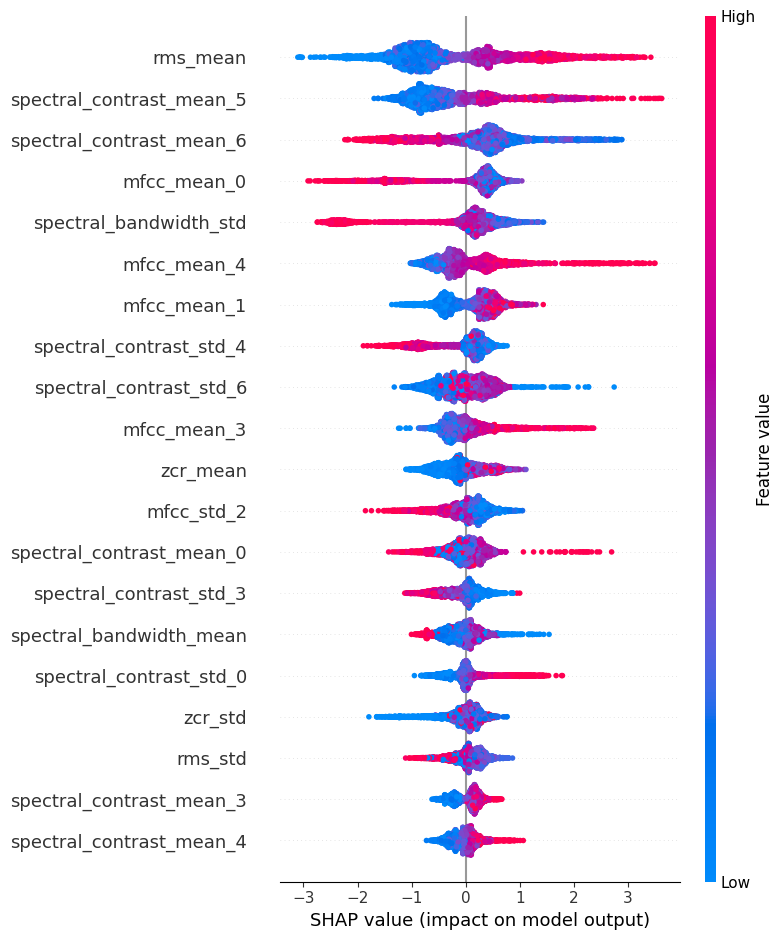

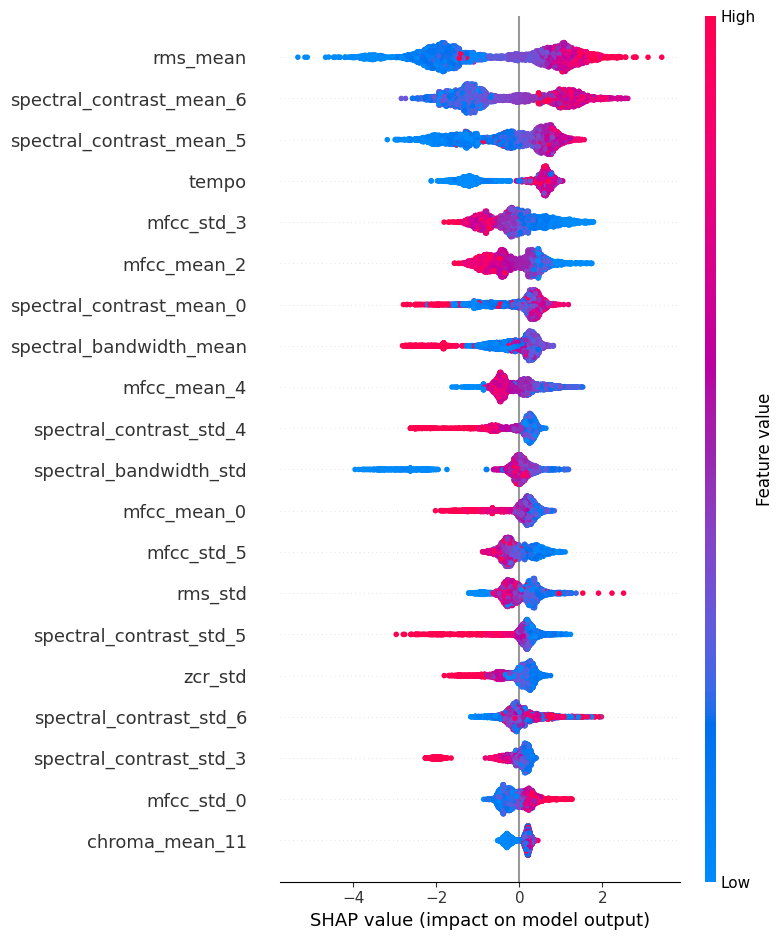

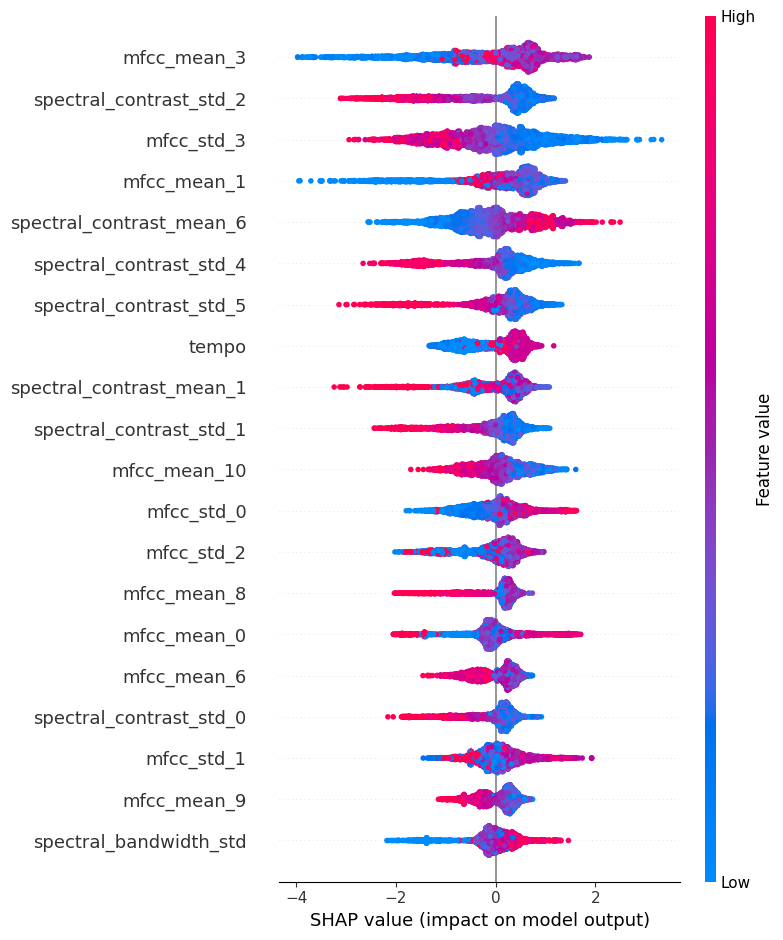

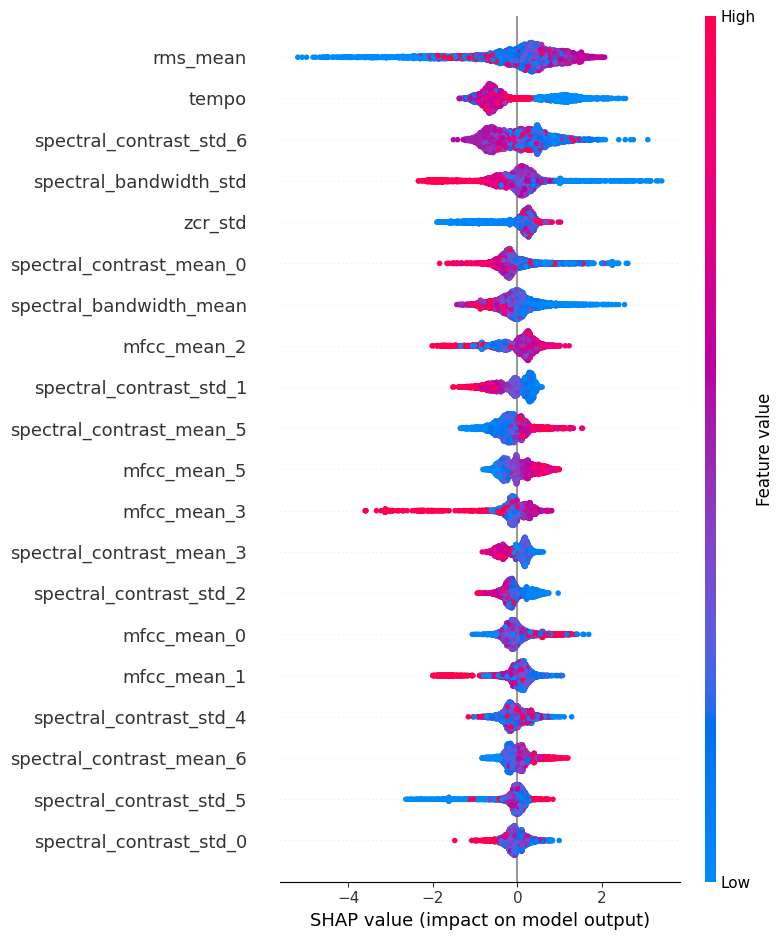

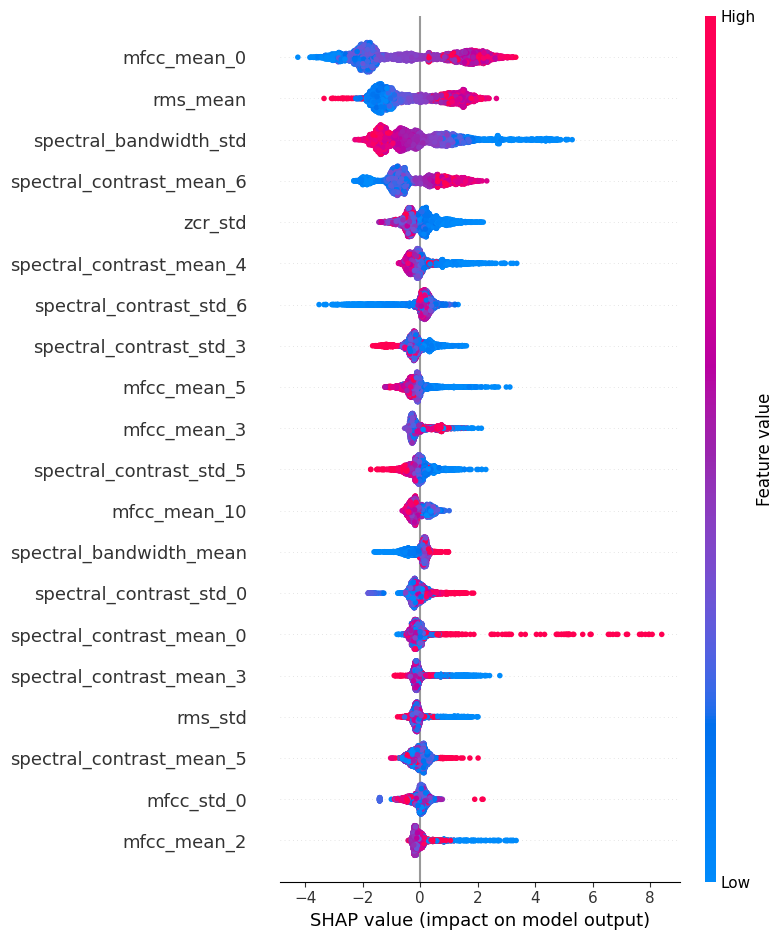

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

for i in range(11):
    shap.summary_plot(shap_values[:, :, i], features=X_test, feature_names=FEATURE_COLUMNS)

## Feauture Selection

### Selected by Feature Importance

In [19]:
selected_feature = importance_df[importance_df['Importance'] > 500]['Feature'].to_list()
print(len(selected_feature))
print(selected_feature)

71
['chroma_mean_2', 'chroma_mean_5', 'chroma_mean_11', 'chroma_mean_8', 'chroma_mean_3', 'chroma_mean_0', 'chroma_mean_6', 'chroma_mean_7', 'chroma_mean_10', 'chroma_mean_9', 'chroma_mean_1', 'chroma_mean_4', 'chroma_std_7', 'chroma_std_1', 'chroma_std_3', 'chroma_std_2', 'chroma_std_6', 'chroma_std_4', 'chroma_std_11', 'chroma_std_5', 'chroma_std_8', 'chroma_std_9', 'chroma_std_0', 'chroma_std_10', 'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_std_12', 'mfcc_std_11', 'mfcc_mean_10', 'mfcc_std_9', 'mfcc_mean_9', 'mfcc_mean_8', 'mfcc_std_10', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_6', 'tempo', 'mfcc_mean_7', 'mfcc_mean_6', 'mfcc_std_5', 'spectral_contrast_std_2', 'mfcc_std_4', 'mfcc_mean_5', 'spectral_contrast_std_1', 'spectral_contrast_mean_2', 'spectral_contrast_mean_1', 'spectral_contrast_mean_3', 'spectral_contrast_std_3', 'mfcc_mean_4', 'zcr_mean', 'mfcc_std_3', 'spectral_contrast_mean_4', 'spectral_contrast_std_4', 'spectral_contrast_std_0', 'mfcc_mean_1', 'mfcc_mean_2', 'zcr_std', 'spect

In [20]:
X_train = train_df[selected_feature].to_numpy()
y_train = train_df[LABEL].to_numpy()

X_test = test_df[selected_feature].to_numpy()
y_test = test_df[LABEL].to_numpy()

model = LGBMClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)
print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17980
[LightGBM] [Info] Number of data points in the train set: 48037, number of used features: 71
[LightGBM] [Info] Start training from score -2.261534
[LightGBM] [Info] Start training from score -2.644966
[LightGBM] [Info] Start training from score -2.456604
[LightGBM] [Info] Start training from score -2.338767
[LightGBM] [Info] Start training from score -2.360146
[LightGBM] [Info] Start training from score -2.329956
[LightGBM] [Info] Start training from score -2.368116
[LightGBM] [Info] Start training from score -2.429297
[LightGBM] [Info] Start training from score -2.529107
[LightGBM] [Info] Start training from score -2.350273
[LightGBM] [Info] Start training from score -2.363460
Top-1 Accuracy: 69.80%
Top-3 Accuracy: 87.62%


### Remove Low Variance Features

In [21]:
X_train = train_df[FEATURE_COLUMNS].to_numpy()
y_train = train_df[LABEL].to_numpy()

X_test = test_df[FEATURE_COLUMNS].to_numpy()
y_test = test_df[LABEL].to_numpy()

selector = VarianceThreshold(threshold=0.2)
selector.fit(X_train)

VarianceThreshold(threshold=0.2)

In [22]:
selected_feature = np.array(FEATURE_COLUMNS)[selector.get_support()]
print(len(selected_feature))
print(selected_feature)

43
['mfcc_mean_0' 'mfcc_mean_1' 'mfcc_mean_2' 'mfcc_mean_3' 'mfcc_mean_4'
 'mfcc_mean_5' 'mfcc_mean_6' 'mfcc_mean_7' 'mfcc_mean_8' 'mfcc_mean_9'
 'mfcc_mean_10' 'mfcc_mean_11' 'mfcc_mean_12' 'mfcc_std_0' 'mfcc_std_1'
 'mfcc_std_2' 'mfcc_std_3' 'mfcc_std_4' 'mfcc_std_5' 'mfcc_std_6'
 'mfcc_std_7' 'mfcc_std_8' 'mfcc_std_9' 'mfcc_std_10' 'mfcc_std_11'
 'mfcc_std_12' 'spectral_contrast_mean_0' 'spectral_contrast_mean_1'
 'spectral_contrast_mean_2' 'spectral_contrast_mean_3'
 'spectral_contrast_mean_4' 'spectral_contrast_mean_5'
 'spectral_contrast_mean_6' 'spectral_contrast_std_0'
 'spectral_contrast_std_1' 'spectral_contrast_std_2'
 'spectral_contrast_std_3' 'spectral_contrast_std_4'
 'spectral_contrast_std_5' 'spectral_contrast_std_6'
 'spectral_bandwidth_mean' 'spectral_bandwidth_std' 'tempo']


In [23]:
X_train = train_df[selected_feature].to_numpy()
y_train = train_df[LABEL].to_numpy()

X_test = test_df[selected_feature].to_numpy()
y_test = test_df[LABEL].to_numpy()

model = LGBMClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

top1_acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, model.predict_proba(X_test), k=3, labels=KNOWN_CLASSES)
print(f"Top-1 Accuracy: {top1_acc * 100:.2f}%")
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10840
[LightGBM] [Info] Number of data points in the train set: 48037, number of used features: 43
[LightGBM] [Info] Start training from score -2.261534
[LightGBM] [Info] Start training from score -2.644966
[LightGBM] [Info] Start training from score -2.456604
[LightGBM] [Info] Start training from score -2.338767
[LightGBM] [Info] Start training from score -2.360146
[LightGBM] [Info] Start training from score -2.329956
[LightGBM] [Info] Start training from score -2.368116
[LightGBM] [Info] Start training from score -2.429297
[LightGBM] [Info] Start training from score -2.529107
[LightGBM] [Info] Start training from score -2.350273
[LightGBM] [Info] Start training from score -2.363460
Top-1 Accuracy: 69.12%
Top-3 Accuracy: 87.01%
